                                    #Análisis propiedades en venta diversas comunas Santiago de Chile

Este conjunto de datos se centra en el análisis de propiedades inmobiliarias ubicadas en diversas comunas de Chile. Contiene información detallada sobre diferentes aspectos relevantes, como precios en pesos chilenos, dólares y unidades de fomento (UF), características de la propiedad (dormitorios, baños, área total y construida, cantidad de estacionamientos), ubicación (distancia a parques y colegios), número de pisos, estado de la vivienda (nuevo, usado, en construcción) y el corredor encargado.

El objetivo principal de este análisis es comprender cómo diversas características y ubicaciones influyen en el precio de venta de las propiedades, permitiendo así a posibles inversionistas y compradores tomar decisiones informadas. Se plantean varias preguntas de investigación y se formulan hipótesis para guiar este estudio.

Definición de Objetivo:
El objetivo de este análisis exploratorio de datos es proporcionar una visión detallada del mercado inmobiliario en diversas comunas de Santiago, Chile. Se busca entender cómo las características y ubicación de las propiedades influyen en su precio de venta. Además, se pretende desarrollar una herramienta predictiva que permita estimar el valor de las viviendas en función de estas variables, para ayudar a posibles inversionistas y compradores a tomar decisiones informadas.

Contexto Comercial:
En el contexto comercial, el mercado inmobiliario es una industria crucial en Chile, especialmente en áreas urbanas como Santiago. Los inversionistas, compradores y vendedores buscan comprender las tendencias del mercado y los factores que afectan los precios de las propiedades. Esta comprensión es esencial para realizar inversiones rentables y tomar decisiones estratégicas en la compra o venta de propiedades.

Problema Comercial:
El problema comercial que se aborda es la necesidad de entender cómo diferentes características y ubicaciones de las propiedades impactan en sus precios de venta. Esta información es vital para los interesados en el mercado inmobiliario, ya que les permite evaluar la rentabilidad de sus inversiones y tomar decisiones acertadas. Además, se busca desarrollar una herramienta predictiva que pueda ayudar en la estimación de precios de las viviendas.

Contexto Analítico:
En el contexto analítico, se utilizarán técnicas de análisis de datos y modelado predictivo utilizando Python, específicamente con bibliotecas como pandas, matplotlib, seaborn y posiblemente scikit-learn. Se buscará explorar la relación entre las características de las propiedades (como dormitorios, baños, área, etc.) y su precio de venta, así como la influencia de la ubicación y el estado de la propiedad en este precio. Se plantearán hipótesis y se evaluarán mediante análisis estadísticos.

Exploración de Datos:
La exploración de datos se basará en el conjunto de datos proporcionado, que contiene información detallada sobre propiedades inmobiliarias en diversas comunas de Santiago, Chile. Se analizarán variables como precios en pesos chilenos, dólares y unidades de fomento, características de la propiedad (dormitorios, baños, área total y construida, cantidad de estacionamientos), ubicación (distancia a parques y colegios), número de pisos y estado de la vivienda (nuevo, usado, en construcción). Se buscará entender patrones, correlaciones y relaciones entre estas variables y el precio de venta de las propiedades. También se validarán hipótesis planteadas para guiar el análisis.
Preguntas de Interes:
¿Cómo influyen las características de una propiedad en su precio de venta? Se busca explorar la relación entre las características de una propiedad, como la cantidad de dormitorios, baños y su área, con su precio de venta.

¿Existe una correlación entre la ubicación de una propiedad y su precio? Se pretende investigar si factores de ubicación, como la comuna y la proximidad a parques y colegios, afectan el precio de venta de la propiedad.

¿Cómo varía el precio de las propiedades según su estado (nuevo, usado, en construcción)? Se busca entender cómo el estado de la propiedad influye en su precio y qué preferencias tienen los compradores.

Hipótesis:
Hipótesis sobre el Precio:

Hipótesis 1: Se postula que propiedades con más dormitorios y baños tienen un precio de venta más alto.
Hipótesis 2: Las propiedades en buen estado (nuevo) tendrán un precio más elevado que las usadas o en construcción.

Hipótesis sobre la Ubicación:

Hipótesis 3: La cercanía a parques y colegios está correlacionada con un precio de venta más alto.
Hipótesis 4: Ciertas comunas pueden tener un precio promedio más alto que otras debido a factores económicos o de demanda.

Hipótesis sobre Características Específicas:

Hipótesis 5: La cantidad de estacionamientos se relaciona positivamente con el precio de venta.
Hipótesis 6: Las propiedades de un solo piso tienen un precio promedio más bajo que las de múltiples pisos.

OBJETIVO : Este análisis exploratorio de datos proporcionará una visión detallada del mercado inmobiliario en comunas de Santiago , permitiendo a los interesados entender las relaciones entre distintas variables y toma de decisiones informadas, obteniendo una herramienta predictiva del valor de las viviendas segun todas las carcteristicas dentro de las variables mencionadas.

In [1]:
import time
import datetime  # Importar datetime para manipulación de fechas y horas
import joblib  # Para utilizar joblib en sys.modules
import re  # Importar re para operaciones de expresiones regulares
import sys  # Para utilizar sys.modules
import numpy as np  # Importar NumPy para operaciones numéricas
import pandas as pd  # Importar Pandas para manipulación de datos
import matplotlib.pyplot as plt  # Importar Matplotlib para visualización de datos
import matplotlib as mpl  # Importar Matplotlib como mpl
import seaborn as sns  # Importar Seaborn para visualización estadística

from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # Importar SequentialFeatureSelector de mlxtend para selección de características
from sklearn.model_selection import train_test_split  # Importar train_test_split para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Importar LinearRegression para modelado de regresión lineal
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Importar StandardScaler y LabelEncoder para preprocesamiento de datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_squared_log_error, r2_score  # Importar métricas de evaluación de modelos
from sklearn.linear_model import Lasso, Ridge  # Importar Lasso y Ridge para modelado de regresión con regularización
from sklearn.ensemble import RandomForestRegressor  # Importar RandomForestRegressor para modelado de regresión con random forest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

pd.options.mode.chained_assignment = None  # Desactiva la advertencia SettingWithCopyWarning
np.seterr(divide='ignore', over='warn', under='ignore', invalid='ignore')
import warnings
# Configurar la gestión de advertencias
warnings.filterwarnings('ignore', category=RuntimeWarning, module='numpy')

In [2]:
# Primero levantamos nuestro dataset desde github
url = "https://raw.githubusercontent.com/pipekatze/DataSet-Coder/main/DF%20Valor%20propiedades%20RM%20-%20Valor%20propiedades%20RM.csv"
df = pd.read_csv(url)

In [3]:
df

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,distan_parkKM,dist_schoolKM,NPisos,Estado,id,Realtor
0,129884400,3600,158396,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,"1,4","0,3",2,0,7850612,Behouse
1,130000000,3603,158537,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,"1,4","0,3",1,0,10081485,NaN
2,172998805,4795,210974,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,"1,0","0,2",3,1,10257247,Bissac
3,135296250,3750,164995,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,"1,3","0,3",2,1,20153043,Ambiento Propiedades
4,195000000,5405,237805,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,"0,9","0,2",1,0,16669338,Puntoinmobiliario.cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,75900000,2104,92561,Quilicura,Venezuela,2.0,1.0,60.0,80.0,4.0,"2,4","0,5",3,0,18778172,Easyprop
2495,469027000,13000,571984,Vitacura,Colegiobradford,4.0,3.0,100.0,250.0,NaN,"0,4","0,1",2,0,18776951,NaN
2496,559224500,15500,681981,LasCondes,Losdominicos,6.0,4.0,215.0,411.0,1.0,"0,3","0,1",1,0,18776929,NaN
2497,396869000,11000,483987,LasCondes,Entrepadreerrázurizychesterton,5.0,3.0,151.0,330.0,NaN,"0,5","0,1",3,1,18776889,NaN


A simple vista al analisis de los datos visualizamos distintos errores que nos impedirian alimentar un modelo y trabajar en el analisis como ejemplo datos que poseen comas por puntos y columnas que no utilizaremos como la id por lo que es necesario realizar varios tratamientos resolviendo los problemas antes mecionados como tambien tratar nulos, vacios entre otros tratamientos.

In [4]:
# Reemplazar valores vacíos en la columna "Parking" por 0
df['Parking'].fillna(0, inplace=True)
# Reemplazar valores vacíos en la columna "Realtor" con el valor superior
df['Realtor'].fillna(method='ffill', inplace=True)
# Reemplazar valores vacíos en las columnas "Built Area" y "Total Area" con el promedio
df['Built Area'].fillna(df['Built Area'].mean(), inplace=True)
df['Total Area'].fillna(df['Total Area'].mean(), inplace=True)
# Reemplazar valores vacíos en las columnas "Dorms" y "Baths" con el número 1
df['Dorms'].fillna(1, inplace=True)
df['Baths'].fillna(1, inplace=True)
# Eliminamos la columna id
# df = df.drop('id', axis=1)

# Reemplazar las comas por puntos en la columna 'distan_parkKM' y 'dist_schoolKM'
df['distan_parkKM'] = df['distan_parkKM'].str.replace(',', '.')
df['dist_schoolKM'] = df['dist_schoolKM'].str.replace(',', '.')

# Convertir las columnas a tipo float
df['distan_parkKM'] = df['distan_parkKM'].astype(float)
df['dist_schoolKM'] = df['dist_schoolKM'].astype(float)

C:\Users\alvar\AppData\Local\Temp\ipykernel_16524\1858873442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parking'].fillna(0, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_16524\1858873442.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [5]:
# Calcula la cantidad de valores distintos en la columna "comuna"
cantidad_valores_distintos = df['Comuna'].nunique()

# Imprime la cantidad de valores distintos
print("Cantidad de valores distintos en la columna 'Comuna':", cantidad_valores_distintos)

Cantidad de valores distintos en la columna 'Comuna': 50


In [6]:
df.isnull().sum()

Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms            0
Baths            0
Built Area       0
Total Area       0
Parking          0
distan_parkKM    0
dist_schoolKM    0
NPisos           0
Estado           0
id               0
Realtor          0
dtype: int64

Para el caso se sometieron a prueba y entrenamiento las tres primeras columnas Price_CLP Price_UF Price_USD por lo que no existe una diferencia significativa en algun procesamiento sobre los datos por lo que se decide elegir para el analisis la variable Price_USD el precio en dolares devido que es un valor monetario mas universal convirtiendoce esta en nuestra valiable objetivo o target.

In [7]:
print
print(df.shape)
print
print(df.describe())
print
print(df.info())
print
print(df.isnull().sum())

(2499, 16)
          Price_CLP       Price_UF     Price_USD        Dorms        Baths  \
count  2.499000e+03    2499.000000  2.499000e+03  2499.000000  2499.000000   
mean   2.964312e+08    8216.174470  3.615015e+05     3.767107     2.511405   
std    2.967694e+08    8225.543268  3.619139e+05     1.448399     1.333264   
min    4.000000e+07    1109.000000  4.878000e+04     1.000000     1.000000   
25%    1.199763e+08    3325.500000  1.463125e+05     3.000000     2.000000   
50%    1.800000e+08    4989.000000  2.195120e+05     3.000000     2.000000   
75%    3.808579e+08   10556.000000  4.644610e+05     4.000000     3.000000   
max    3.607900e+09  100000.000000  4.399878e+06    18.000000    17.000000   

         Built Area     Total Area      Parking  distan_parkKM  dist_schoolKM  \
count  2.499000e+03    2499.000000  2499.000000    2499.000000    2499.000000   
mean   2.232933e+04     986.227801     1.772309       1.132733       0.228972   
std    1.001635e+06   15394.505680     1.92

In [8]:
comuna_dummies = pd.get_dummies(df['Comuna'], prefix='Comuna')

# Concatenar las variables ficticias con el DataFrame original
df = pd.concat([df, comuna_dummies], axis=1)

realizando ingeneria sobre los datos nos damos cuenta de la utilidad de convertir la columna Comuna para poder hacerla viable para el modelo donde la 
tranformaremos en dummy para asi determinar lo que puede explicar cada variable sobre el modelo.

In [9]:
df

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,...,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanPedro,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,129884400,3600,158396,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,130000000,3603,158537,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,172998805,4795,210974,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3,135296250,3750,164995,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,195000000,5405,237805,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,75900000,2104,92561,Quilicura,Venezuela,2.0,1.0,60.0,80.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2495,469027000,13000,571984,Vitacura,Colegiobradford,4.0,3.0,100.0,250.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2496,559224500,15500,681981,LasCondes,Losdominicos,6.0,4.0,215.0,411.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2497,396869000,11000,483987,LasCondes,Entrepadreerrázurizychesterton,5.0,3.0,151.0,330.0,0.0,...,False,False,False,False,False,False,False,False,False,False


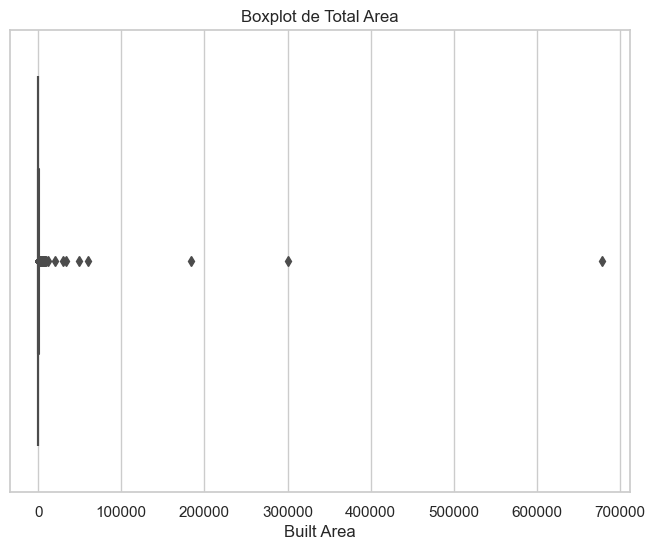

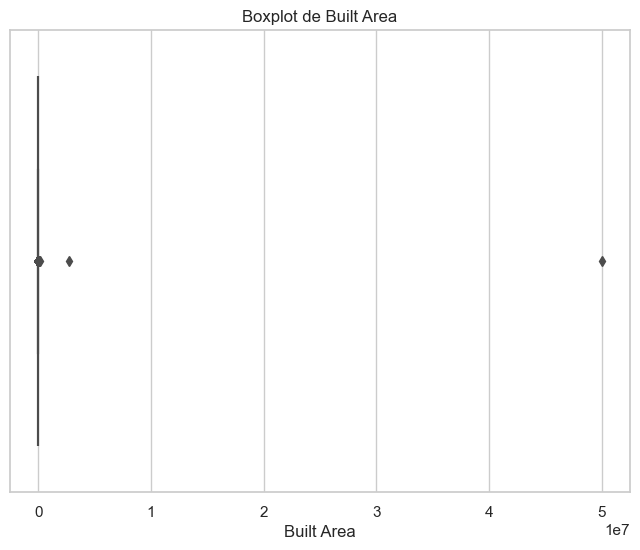

In [10]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Area'])

# Añadir título y etiquetas
plt.title('Boxplot de Total Area')
plt.xlabel('Built Area')

# Mostrar el boxplot
plt.show()
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Built Area'])

# Añadir título y etiquetas
plt.title('Boxplot de Built Area')
plt.xlabel('Built Area')

# Mostrar el boxplot
plt.show()


Al observar estos diagramas de caja y bigotes, notamos una variedad de datos atípicos que dificultan la interpretación clara del gráfico. Estos valores atípicos serán excluidos para una evaluación más precisa tanto en la columna de área construida como en el área total.

In [11]:
# Calcular el rango intercuartil (IQR) para 'Built Area'
Q1_built_area = df['Built Area'].quantile(0.25)
Q3_built_area = df['Built Area'].quantile(0.75)
IQR_built_area = Q3_built_area - Q1_built_area

# Calcular los límites para identificar outliers en 'Built Area'
lower_bound_built_area = Q1_built_area - 1 * IQR_built_area
upper_bound_built_area = Q3_built_area + 1 * IQR_built_area

# Filtrar los datos para eliminar outliers de 'Built Area'
df = df[(df['Built Area'] >= lower_bound_built_area) & (df['Built Area'] <= upper_bound_built_area)]

# Calcular el rango intercuartil (IQR) para 'Total Area'
Q1_total_area = df['Total Area'].quantile(0.25)
Q3_total_area = df['Total Area'].quantile(0.75)
IQR_total_area = Q3_total_area - Q1_total_area

# Calcular los límites para identificar outliers en 'Total Area'
lower_bound_total_area = Q1_total_area - 1 * IQR_total_area
upper_bound_total_area = Q3_total_area + 1 * IQR_total_area

# Filtrar los datos para eliminar outliers de 'Total Area'
df = df[(df['Total Area'] >= lower_bound_total_area) & (df['Total Area'] <= upper_bound_total_area)]

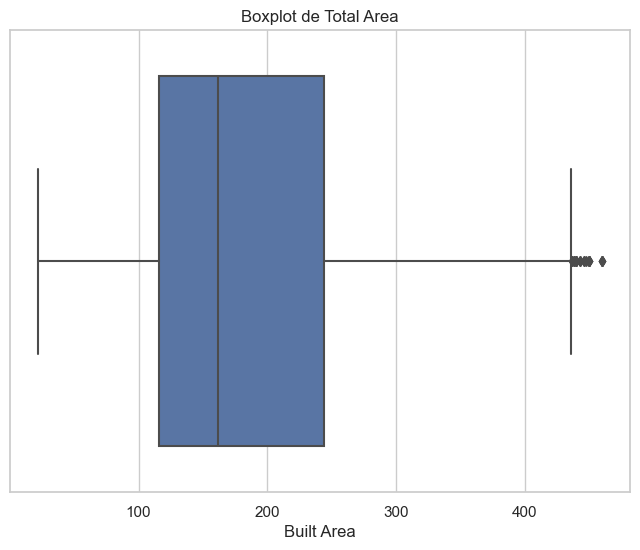

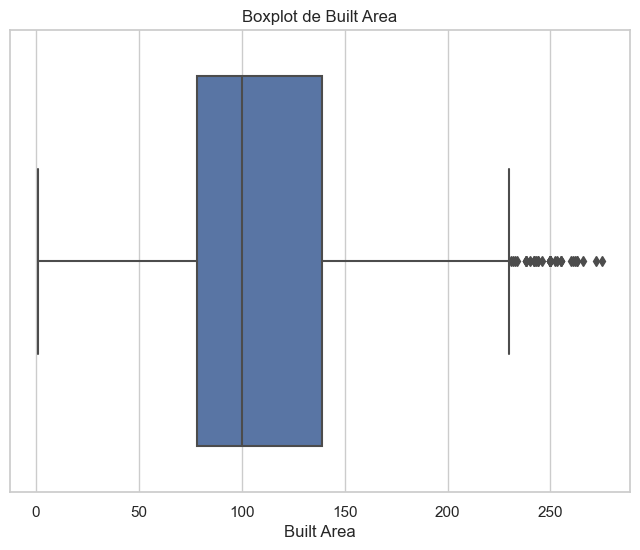

In [12]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Area'])

# Añadir título y etiquetas
plt.title('Boxplot de Total Area')
plt.xlabel('Built Area')

# Mostrar el boxplot
plt.show()

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Built Area'])

# Añadir título y etiquetas
plt.title('Boxplot de Built Area')
plt.xlabel('Built Area')

# Mostrar el boxplot
plt.show()

Al observar un boxplot con los datos corregidos y reduciendo los datos atipicos, podemos apreciar claramente la mediana, el rango intercuartil y los valores atípicos lo que nos permite tener una visión precisa de la distribución de los datos facilitando las comparaciones entre diferentes grupos o categorías.

In [13]:
df.shape

(1921, 66)

# Alalisis Variable Objetivo

Ahora procederemos a analizar gráficamente nuestra variable objetivo utilizando un histograma. Esto nos permitirá continuar tomando decisiones en cuanto a ingeniería de datos y evaluar el modelo más apropiado para nuestros propósitos.

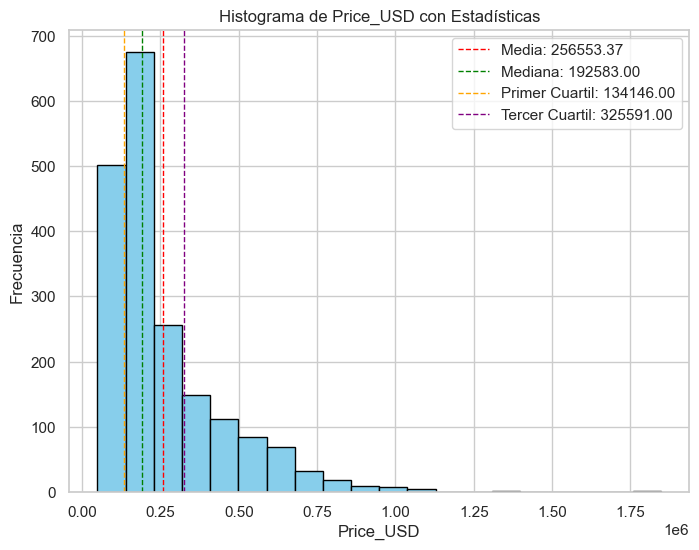

In [14]:
# Calcular estadísticas
media = df['Price_USD'].mean()
mediana = df['Price_USD'].median()
primer_cuartil = df['Price_USD'].quantile(0.25)
tercer_cuartil = df['Price_USD'].quantile(0.75)

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(df['Price_USD'], bins=20, color='skyblue', edgecolor='black')

# Añadir líneas verticales para la media, mediana, primer y tercer cuartil
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.axvline(primer_cuartil, color='orange', linestyle='dashed', linewidth=1, label=f'Primer Cuartil: {primer_cuartil:.2f}')
plt.axvline(tercer_cuartil, color='purple', linestyle='dashed', linewidth=1, label=f'Tercer Cuartil: {tercer_cuartil:.2f}')

# Añadir título y etiquetas
plt.title('Histograma de Price_USD con Estadísticas')
plt.xlabel('Price_USD')
plt.ylabel('Frecuencia')
plt.legend()

In [15]:
# Transformar la variable 'Price_USD' a su logaritmo
df['Price_USD_log'] = np.log(df['Price_USD'])


Después de observar que la variable inicialmente no presenta una distribución simétrica y muestra una distribución simétrica positiva, optaremos por aplicar el logaritmo a la variable. Esto dará como resultado una distribución que se aproxima más a una distribución normal.

C:\Users\alvar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


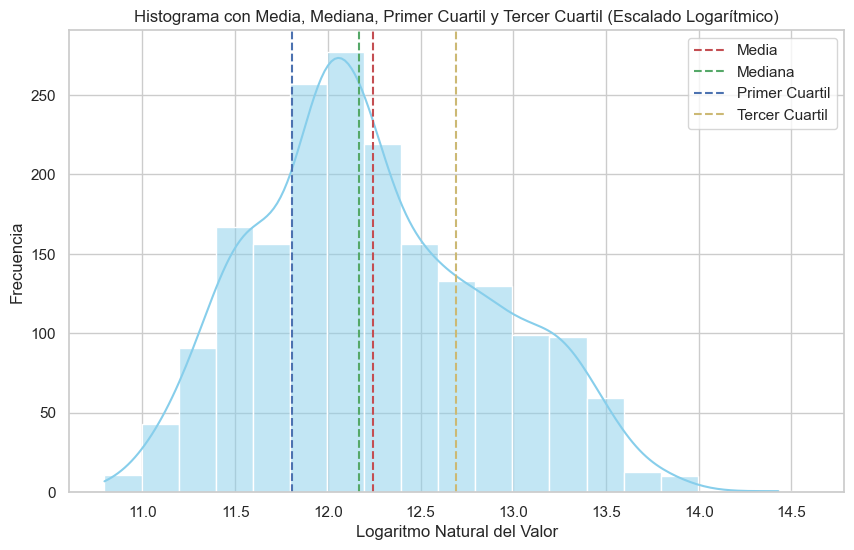

In [16]:
# Variable de interés
variable_target = df['Price_USD']

# Aplicar logaritmo natural para normalizar los datos
variable_target_log = np.log(variable_target)

# Crear el histograma con barras más anchas
plt.figure(figsize=(10, 6))
sns.histplot(variable_target_log, kde=True, color='skyblue', binwidth=0.2)  # Ajusta el valor de binwidth según tu preferencia

# Calcular y agregar la media, mediana, primer cuartil y tercer cuartil en la escala logarítmica
mean_value_log = np.mean(variable_target_log)
median_value_log = np.median(variable_target_log)
q1_log = np.percentile(variable_target_log, 25)
q3_log = np.percentile(variable_target_log, 75)

plt.axvline(mean_value_log, color='r', linestyle='--', label='Media')
plt.axvline(median_value_log, color='g', linestyle='--', label='Mediana')
plt.axvline(q1_log, color='b', linestyle='--', label='Primer Cuartil')
plt.axvline(q3_log, color='y', linestyle='--', label='Tercer Cuartil')

plt.xlabel('Logaritmo Natural del Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Histograma con Media, Mediana, Primer Cuartil y Tercer Cuartil (Escalado Logarítmico)')
plt.show()


De esta manera, podemos notar que esta distribución se asemeja más a una distribución normal. Ahora procederemos a examinar la distribución gráfica de las demás variables.

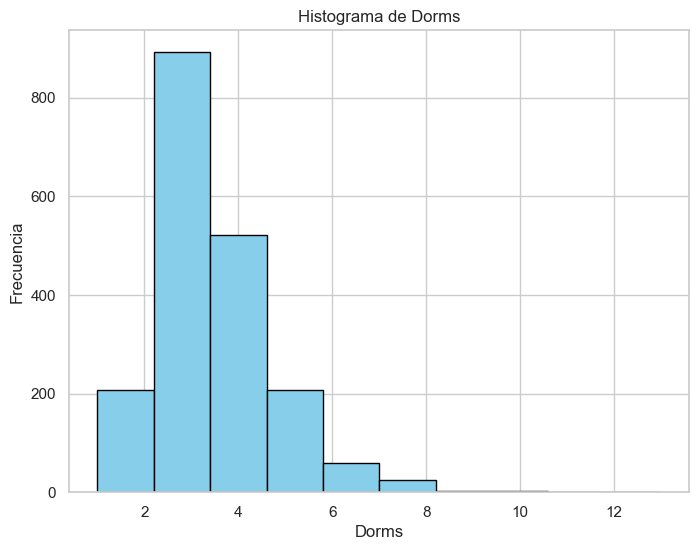

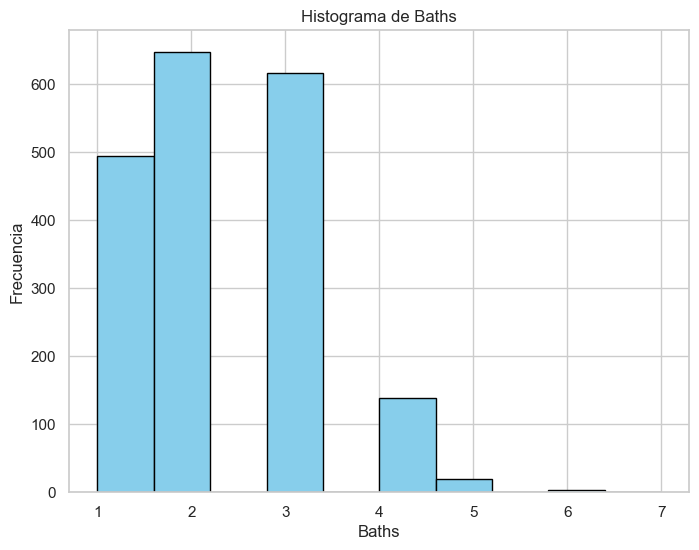

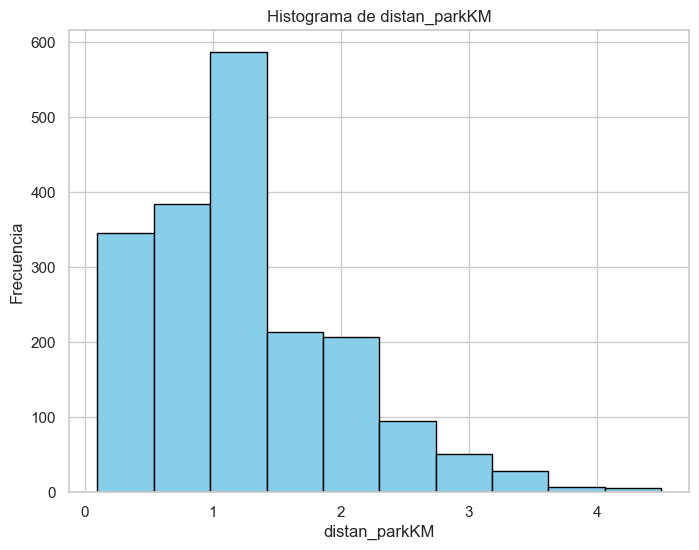

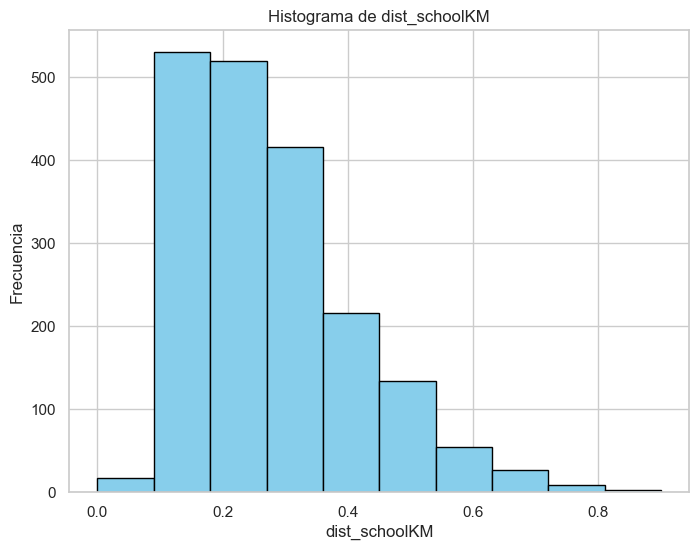

In [17]:
# Crear histograma para 'Dorms'
plt.figure(figsize=(8, 6))
plt.hist(df['Dorms'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Dorms')
plt.xlabel('Dorms')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Crear histograma para 'Baths'
plt.figure(figsize=(8, 6))
plt.hist(df['Baths'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Baths')
plt.xlabel('Baths')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Crear histograma para 'distan_parkKM'
plt.figure(figsize=(8, 6))
plt.hist(df['distan_parkKM'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de distan_parkKM')
plt.xlabel('distan_parkKM')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Crear histograma para 'dist_schoolKM'
plt.figure(figsize=(8, 6))
plt.hist(df['dist_schoolKM'], bins=10, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de dist_schoolKM')
plt.xlabel('dist_schoolKM')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Analisis bivariado de variables.

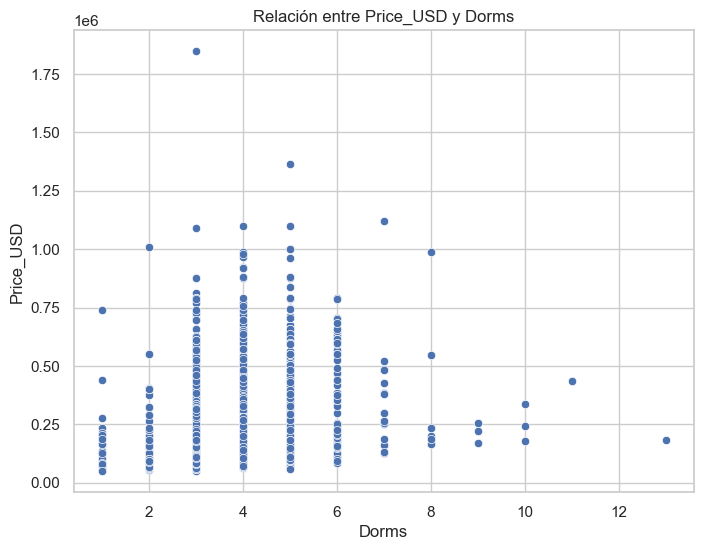

In [18]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dorms', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y Dorms')
plt.xlabel('Dorms')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()

Observamos que a medida que aumenta el número de dormitorios, el valor también tiende a aumentar. Sin embargo, llegamos a un punto límite en torno a los cinco dormitorios, después del cual la relación entre el precio y la cantidad de dormitorios se desvanece.

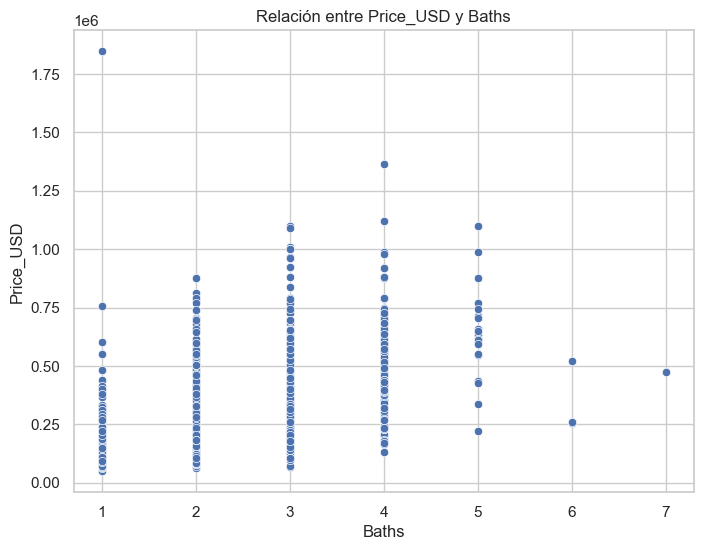

In [19]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Baths', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y Baths')
plt.xlabel('Baths')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()


En lo que respecta a la cantidad de baños, observamos un fenómeno similar al de los dormitorios: el valor de la vivienda aumenta a medida que se incrementa el número de baños. Sin embargo, este aumento se estabiliza alrededor de cuatro baños en la vivienda, ya que la importancia relativa de cada baño adicional comienza a disminuir en comparación con el costo total de la vivienda.

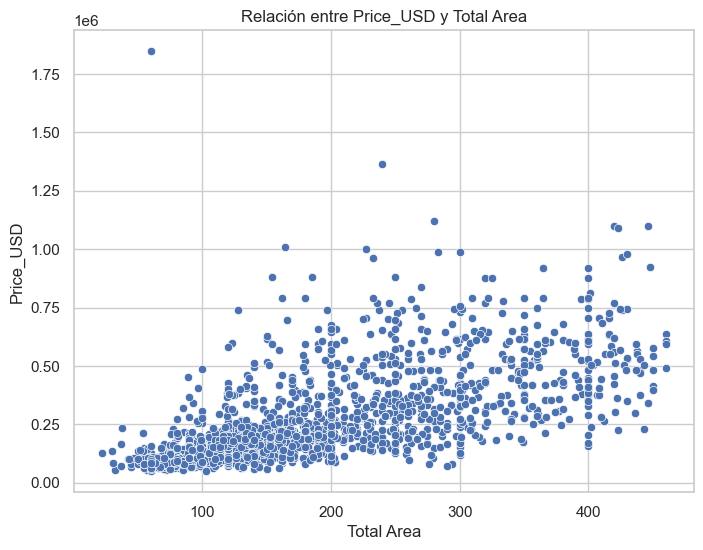

In [20]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Area', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y Total Area')
plt.xlabel('Total Area')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()


Claramente existe una relación positiv tal vez baja o moderadaa entre el área total de las viviendas y su valor. Esto sugiere que, en general, a medida que aumenta el área total de una vivienda, su valor tiende a incrementarse. Este hallazgo resalta la importancia del tamaño de la propiedad como un factor influyente en su precio.

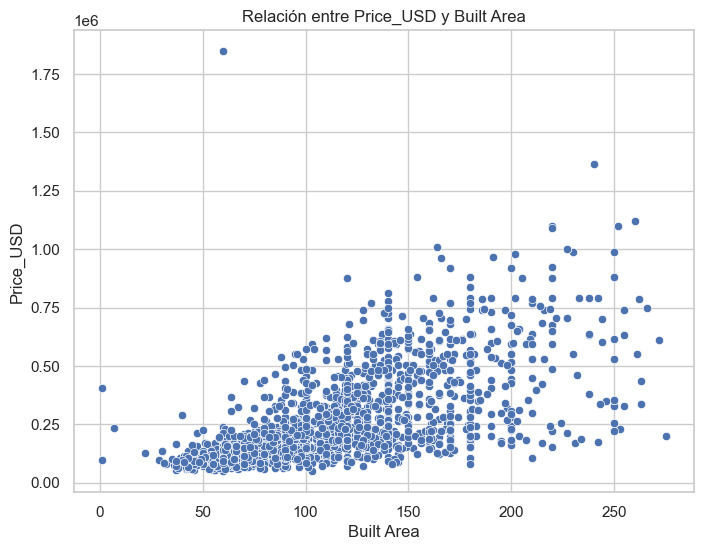

In [21]:

# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Built Area', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y Built Area')
plt.xlabel('Built Area')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()

En el caso del area construida existe una relación positiva tal vez baja o moderada entre el área construida de las viviendas y su valor. Esto sugiere que, en general, a medida que aumenta el área construida de una vivienda, su valor tiende a incrementarse.

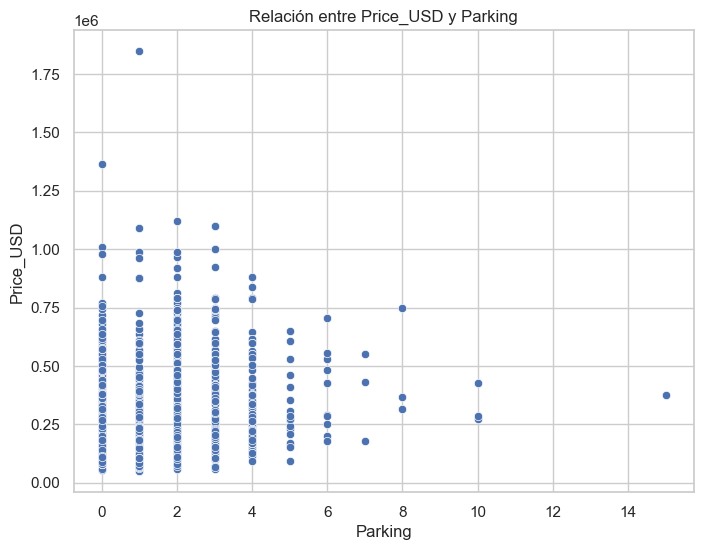

In [22]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Parking', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y Parking')
plt.xlabel('Parking')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()


En lo que respecta a los estacionamientos, encontramos que la relación con el valor de la vivienda es positiva hasta alcanzar una cantidad de dos estacionamientos. Sin embargo, después de este punto, la relación tiende a disminuir o volverse menos clara. Esto sugiere que, aunque los estacionamientos adicionales inicialmente agregan valor a la propiedad, existe un límite después del cual la importancia relativa de cada espacio de estacionamiento adicional disminuye.

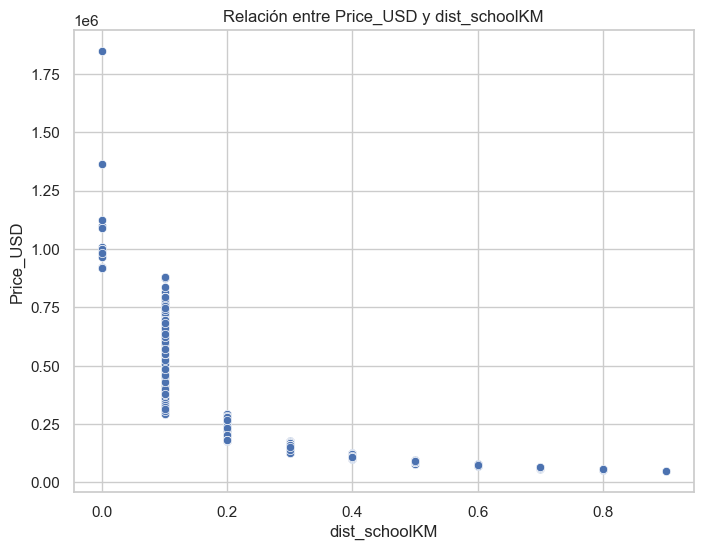

In [23]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dist_schoolKM', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y dist_schoolKM')
plt.xlabel('dist_schoolKM')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()


En cuanto a la distancia de las viviendas a las escuelas, observamos una relacióninversa  notablemente positiva. A medida que la distancia disminuye, es decir, mientras las viviendas se encuentran más cerca de las escuelas, tienden a ser considerablemente más costosas. Este hallazgo sugiere que la proximidad a las escuelas ejerce una influencia significativa en el precio de las viviendas, posiblemente debido a la conveniencia y accesibilidad que ofrece para las familias con niños en edad escolar.

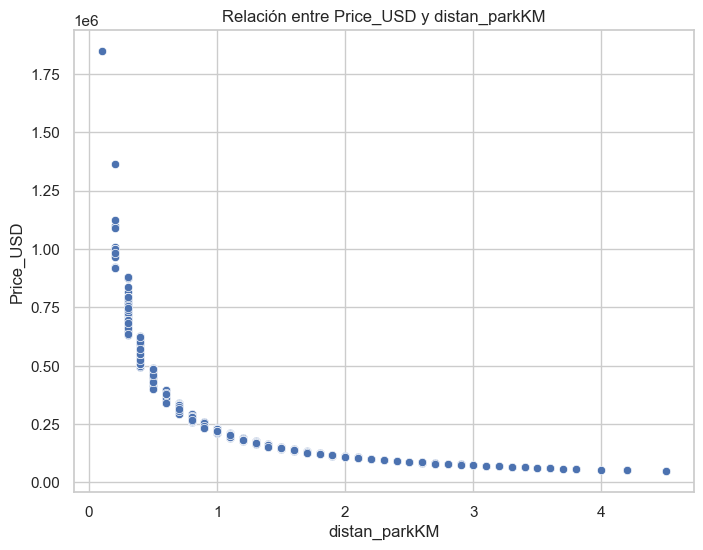

In [24]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distan_parkKM', y='Price_USD', data=df)

# Añadir título y etiquetas
plt.title('Relación entre Price_USD y distan_parkKM')
plt.xlabel('distan_parkKM')
plt.ylabel('Price_USD')

# Mostrar el scatter plot
plt.grid(True)
plt.show()


Con respecto a la distancia de las viviendas a los parques y áreas verdes, observamos una relación positiva considerablemente fuerte. A medida que la distancia disminuye y las viviendas están más cerca de parques y áreas verdes, tienden a tener un precio considerablemente más alto. Este hallazgo sugiere que la cercanía a espacios verdes y recreativos ejerce una influencia significativa en el precio de las viviendas, posiblemente debido a la valoración de la naturaleza y el acceso a áreas de esparcimiento por parte de los compradores de vivienda.

# Determinando la correlación entre variables utilizando el método de Pearson.

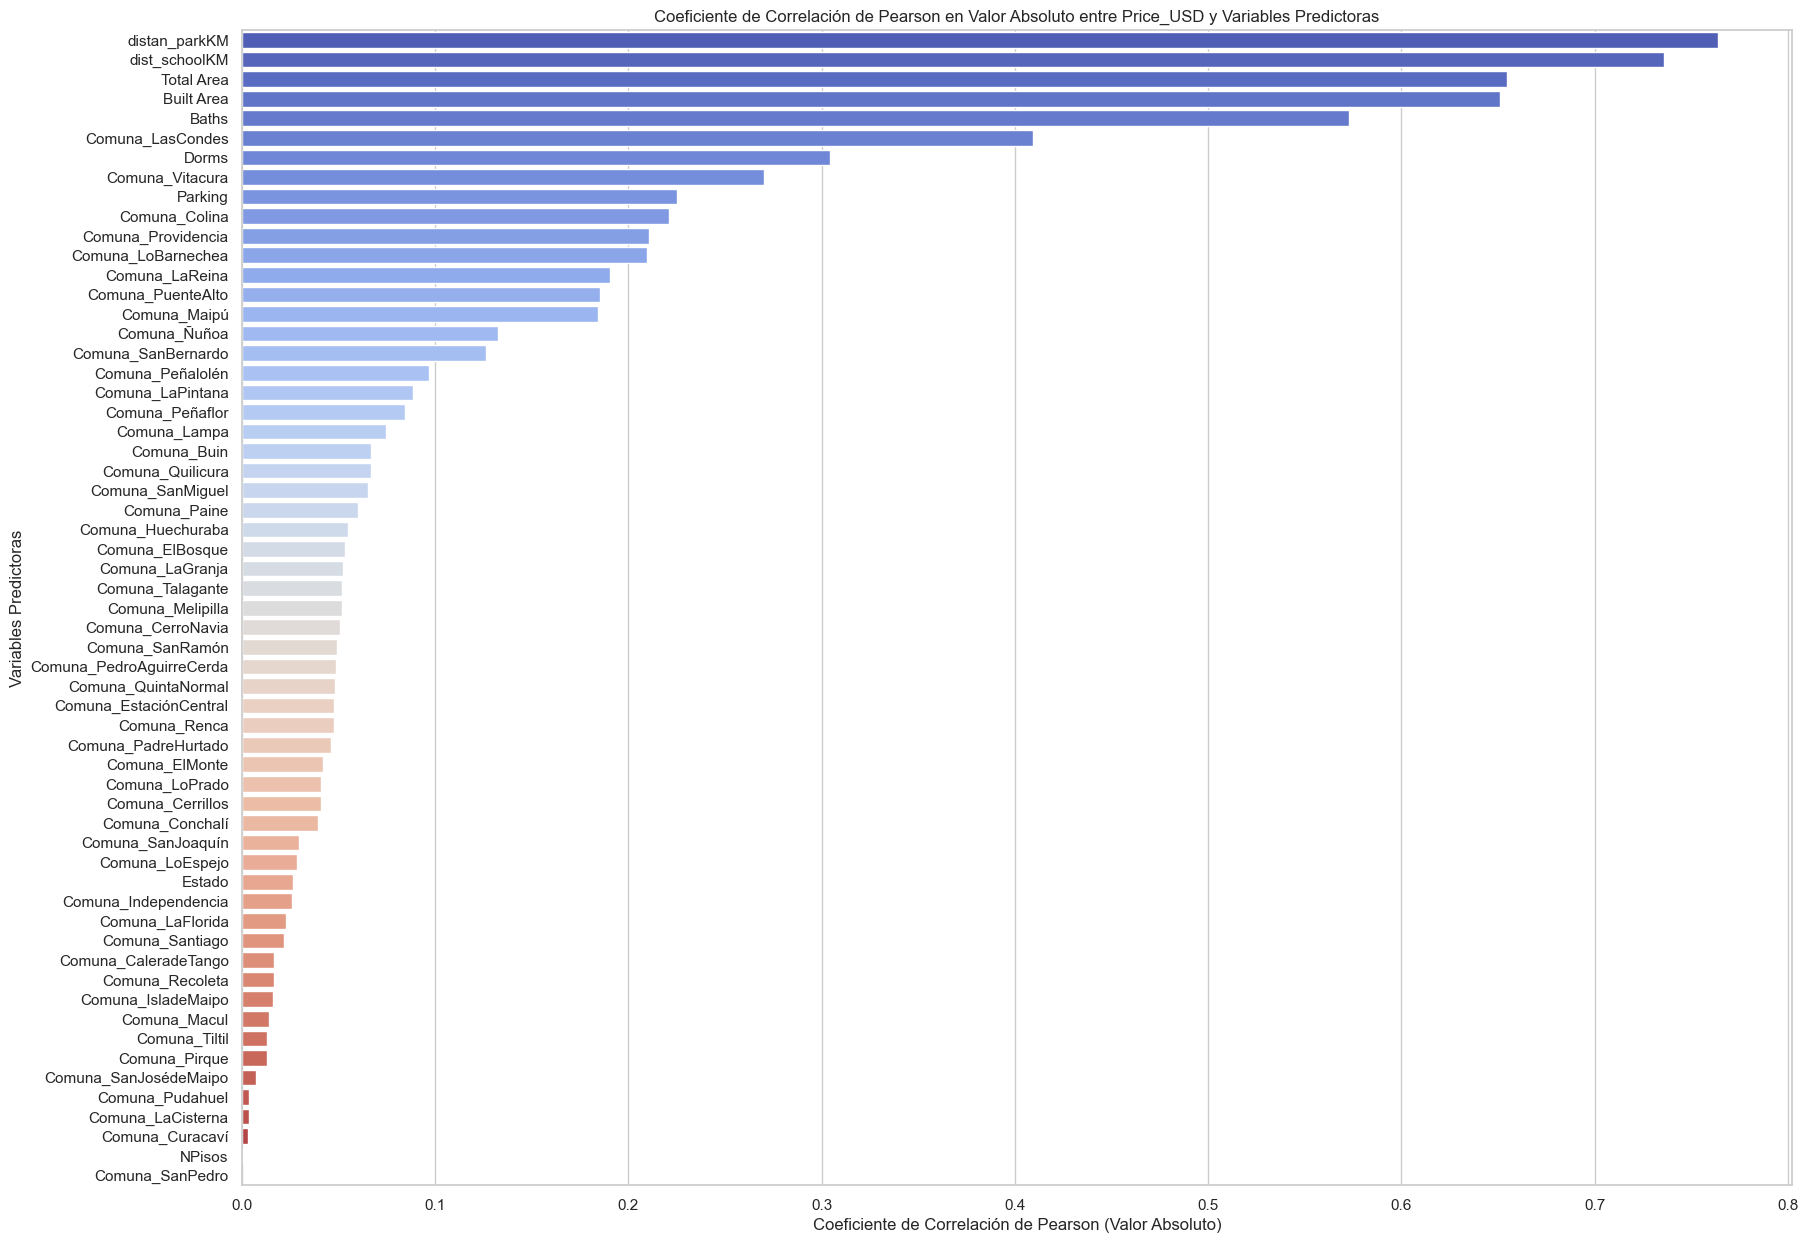

In [25]:
# Suponiendo que tienes un DataFrame llamado 'datos' con las columnas mencionadas
# Calcular la matriz de correlación de Pearson
correlation_matrix = df[['Price_USD', 'Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking', 'distan_parkKM', 'dist_schoolKM', 'NPisos', 'Estado', 'Comuna_Buin', 'Comuna_CaleradeTango', 'Comuna_Cerrillos', 'Comuna_CerroNavia', 'Comuna_Colina', 'Comuna_Conchalí', 'Comuna_Curacaví', 'Comuna_ElBosque', 'Comuna_ElMonte', 'Comuna_EstaciónCentral', 'Comuna_Huechuraba', 'Comuna_Independencia', 'Comuna_IsladeMaipo', 'Comuna_LaCisterna', 'Comuna_LaFlorida', 'Comuna_LaGranja', 'Comuna_LaPintana', 'Comuna_LaReina', 'Comuna_Lampa', 'Comuna_LasCondes', 'Comuna_LoBarnechea', 'Comuna_LoEspejo', 'Comuna_LoPrado', 'Comuna_Macul', 'Comuna_Maipú', 'Comuna_Melipilla', 'Comuna_PadreHurtado', 'Comuna_Paine', 'Comuna_PedroAguirreCerda', 'Comuna_Peñaflor', 'Comuna_Peñalolén', 'Comuna_Pirque', 'Comuna_Providencia', 'Comuna_Pudahuel', 'Comuna_PuenteAlto', 'Comuna_Quilicura', 'Comuna_QuintaNormal', 'Comuna_Recoleta', 'Comuna_Renca', 'Comuna_SanBernardo', 'Comuna_SanJoaquín', 'Comuna_SanJosédeMaipo', 'Comuna_SanMiguel', 'Comuna_SanPedro', 'Comuna_SanRamón', 'Comuna_Santiago', 'Comuna_Talagante', 'Comuna_Tiltil', 'Comuna_Vitacura', 'Comuna_Ñuñoa'
]].corr()

# Extraer los coeficientes de correlación de 'Price_USD' con las variables predictoras
correlation_with_price = correlation_matrix['Price_USD'].drop('Price_USD')

# Calcular el valor absoluto de los coeficientes de correlación
correlation_with_price_abs = correlation_with_price.abs()

# Ordenar los coeficientes de correlación de mayor a menor en valor absoluto
correlation_with_price_sorted = correlation_with_price_abs.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 15))
sns.barplot(x=correlation_with_price_sorted.values, y=correlation_with_price_sorted.index, palette='coolwarm')

# Añadir título y etiquetas
plt.title('Coeficiente de Correlación de Pearson en Valor Absoluto entre Price_USD y Variables Predictoras')
plt.xlabel('Coeficiente de Correlación de Pearson (Valor Absoluto)')
plt.ylabel('Variables Predictoras')

# Mostrar el gráfico
plt.show()


Hemos llevado a cabo una clasificación de las variables, agrupándolas según su coeficiente de correlación de Pearson. Aquellas con un coeficiente superior a 0.4 las consideraremos como las "mejores variables", comprendiendo las primeras siete. Luego, consolidaremos todas las variables existentes bajo la categoría de "Todas".

In [26]:
X_Mejores = df[['distan_parkKM', 'dist_schoolKM', 'Total Area', 'Built Area', 'Baths', 'Comuna_LasCondes', 'Dorms']] 
X_Todas = df[['Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking', 'distan_parkKM', 'dist_schoolKM', 'NPisos',
              'Comuna_Buin', 'Comuna_CaleradeTango', 'Comuna_Cerrillos', 'Comuna_CerroNavia', 'Comuna_Colina', 'Comuna_Conchalí', 
              'Comuna_Curacaví', 'Comuna_ElBosque', 'Comuna_ElMonte', 'Comuna_EstaciónCentral', 'Comuna_Huechuraba', 'Comuna_Independencia', 
              'Comuna_IsladeMaipo', 'Comuna_LaCisterna', 'Comuna_LaFlorida', 'Comuna_LaGranja', 'Comuna_LaPintana', 'Comuna_LaReina', 'Comuna_Lampa', 
              'Comuna_LasCondes', 'Comuna_LoBarnechea', 'Comuna_LoEspejo', 'Comuna_LoPrado', 'Comuna_Macul', 'Comuna_Maipú', 'Comuna_Melipilla', 
              'Comuna_PadreHurtado', 'Comuna_Paine', 'Comuna_PedroAguirreCerda', 'Comuna_Peñaflor', 'Comuna_Peñalolén', 'Comuna_Pirque', 'Comuna_Providencia', 
              'Comuna_Pudahuel', 'Comuna_PuenteAlto', 'Comuna_Quilicura', 'Comuna_QuintaNormal', 'Comuna_Recoleta', 'Comuna_Renca', 'Comuna_SanBernardo', 
              'Comuna_SanJoaquín', 'Comuna_SanJosédeMaipo', 'Comuna_SanMiguel', 'Comuna_SanPedro', 'Comuna_SanRamón', 'Comuna_Santiago', 'Comuna_Talagante', 
              'Comuna_Tiltil', 'Comuna_Vitacura', 'Comuna_Ñuñoa']]



# Entrenamiento y conjunto de pruebas.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = X_Mejores
y = df['Price_USD_log']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = model.predict(X_train)

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Imprimir las métricas de evaluación para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
print(f'Mean Absolute Error: {mae_train}')
print(f'Mean Squared Error: {mse_train}')
print(f'Median Absolute Error: {medae_train}')
print(f'R-squared: {r2_train}')


# Evaluar el modelo en el conjunto de prueba
y_pred_test = model.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas de evaluación para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
print(f'Mean Absolute Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'Median Absolute Error: {medae_test}')
print(f'R-squared: {r2_test}')


Métricas para el conjunto de entrenamiento:
Mean Absolute Error: 0.010384672965772574
Mean Squared Error: 0.00028079347641017806
Median Absolute Error: 0.006440161136617384
R-squared: 0.9992930060411133

Métricas para el conjunto de prueba:
Mean Absolute Error: 0.02892959597650524
Mean Squared Error: 0.0018332601607820866
Median Absolute Error: 0.018406283737679274
R-squared: 0.995431158402358


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = X_Todas
y = df['Price_USD_log']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = model.predict(X_train)

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
medae_train = median_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Imprimir las métricas de evaluación para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
print(f'Mean Absolute Error: {mae_train}')
print(f'Mean Squared Error: {mse_train}')
print(f'Median Absolute Error: {medae_train}')
print(f'R-squared: {r2_train}')


# Evaluar el modelo en el conjunto de prueba
y_pred_test = model.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas de evaluación para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
print(f'Mean Absolute Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'Median Absolute Error: {medae_test}')
print(f'R-squared: {r2_test}')


Métricas para el conjunto de entrenamiento:
Mean Absolute Error: 0.010229674237762503
Mean Squared Error: 0.00026306989231085655
Median Absolute Error: 0.006361240488235609
R-squared: 0.9993376312476824

Métricas para el conjunto de prueba:
Mean Absolute Error: 0.027460802614094875
Mean Squared Error: 0.0015772782378198854
Median Absolute Error: 0.01752294753613981
R-squared: 0.9960691152417054


Luego de realizar diversas pruebas con el modelo con los mismos parametros tanto con la variables X_todas donde se incluyen todas las variables como con X_Mejores que representan las 7 mejores variables  tanto en modelo de regresión lineal , RandomForestRegressor, CatBoostRegressor, DecisionTreeRegressor, se obtienen resultados similares con pequeñas diferencias donde el modelo con peor rendimiento fue la de regresion lineal con X_Mejores con un R-0.9306 y la con el mejor rendimiento y resultado fue RandomForestRegressor con X_Todas donde se mejora el valor a R-0.9960 y tambien mejoro la cantidad de errores en consecuencia elegiremos este modelo como el mas optimo para seguir trabajando por lo que a continuacion realizaremos la optimizacion del modelo.

# Optimizacion del Modelo

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definir los parámetros que deseas buscar
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt'],  # Número máximo de características consideradas para dividir un nodo
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias para ser una hoja
    'bootstrap': [True, False]  # Método de muestreo de observaciones para la construcción de árboles
}

# Crear el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Realizar Randomized Search Cross Validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Ajustar el modelo
rf_random.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(rf_random.best_params_)

# Evaluar el modelo en el conjunto de prueba utilizando los mejores parámetros encontrados
y_pred_test = rf_random.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir las métricas de evaluación para el conjunto de prueba
print("\nMétricas para el conjunto de prueba con los mejores parámetros encontrados:")
print(f'Mean Absolute Error: {mae_test}')
print(f'Mean Squared Error: {mse_test}')
print(f'Median Absolute Error: {medae_test}')
print(f'R-squared: {r2_test}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\alvar\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parámetros encontrados:
{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

Métricas para el conjunto de prueba con los mejores parámetros encontrados:
Mean Absolute Error: 0.027272691776162605
Mean Squared Error: 0.0015440188937556713
Median Absolute Error: 0.016896748671877404
R-squared: 0.9961520040088981


# Colcusion del modelo 

Basándonos en los análisis de datos y el entrenamiento del modelo, hemos obtenido resultados muy prometedores. Inicialmente, al evaluar el modelo sin optimización, observamos un rendimiento excepcional tanto en el conjunto de entrenamiento como en el de prueba, con un R-cuadrado cercano a 1 en ambos casos, lo que indica un ajuste muy bueno del modelo a los datos.

Después de realizar la optimización del modelo utilizando Randomized Search Cross Validation, pudimos mejorar ligeramente las métricas del conjunto de prueba. Aunque las mejoras fueron modes al igual que los errores. E, estos resultados validan la robustez del modelo inicial y sugieren que está cerca de su máximo rendimiento.

En resumen, nuestros análisis y la optimización del modelo han demostrado que estamos trabajando con un modelo altamente efectivo y preciso para predecir los valores objetivo. Esto proporciona una base sólida para su implementación en aplicaciones prác por lo que nos quedamos con este ultimo modelo optimizado.icas.